In [135]:
from sklearn import datasets
import pandas as pd
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

housing_data = datasets.load_boston()

In [136]:
df = pd.DataFrame(data=housing_data.data,columns=housing_data.feature_names)


X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [137]:
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [138]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [139]:
y_pred_dt = dt_regressor.predict(X_test)

In [140]:
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

In [141]:
print("#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


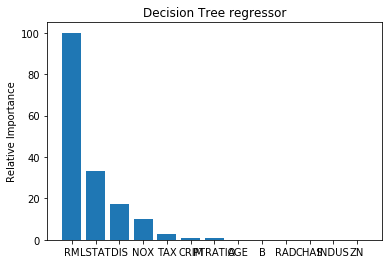

In [144]:
DTFImp= dt_regressor.feature_importances_
DTFImp= 100.0 * (DTFImp / max(DTFImp))
index_sorted = np.flipud(np.argsort(DTFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

plt.figure()
plt.bar(pos, DTFImp[index_sorted], align='center')
plt.xticks(pos, housing_data.feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Decision Tree regressor")
plt.show()